In [1]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_regression
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def apply_pca(X, standardize=True):
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    
    # Create principal components
    pca = PCA()
    X_pca = pca.fit_transform(X)
    
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )
    return pca, X_pca, loadings # Loadings are the feature combinations that make up the principal components

In [3]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

In [4]:
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target


In [25]:
df = load_iris(as_frame=True).data
df = pd.concat((df, load_iris(as_frame=True).target), axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


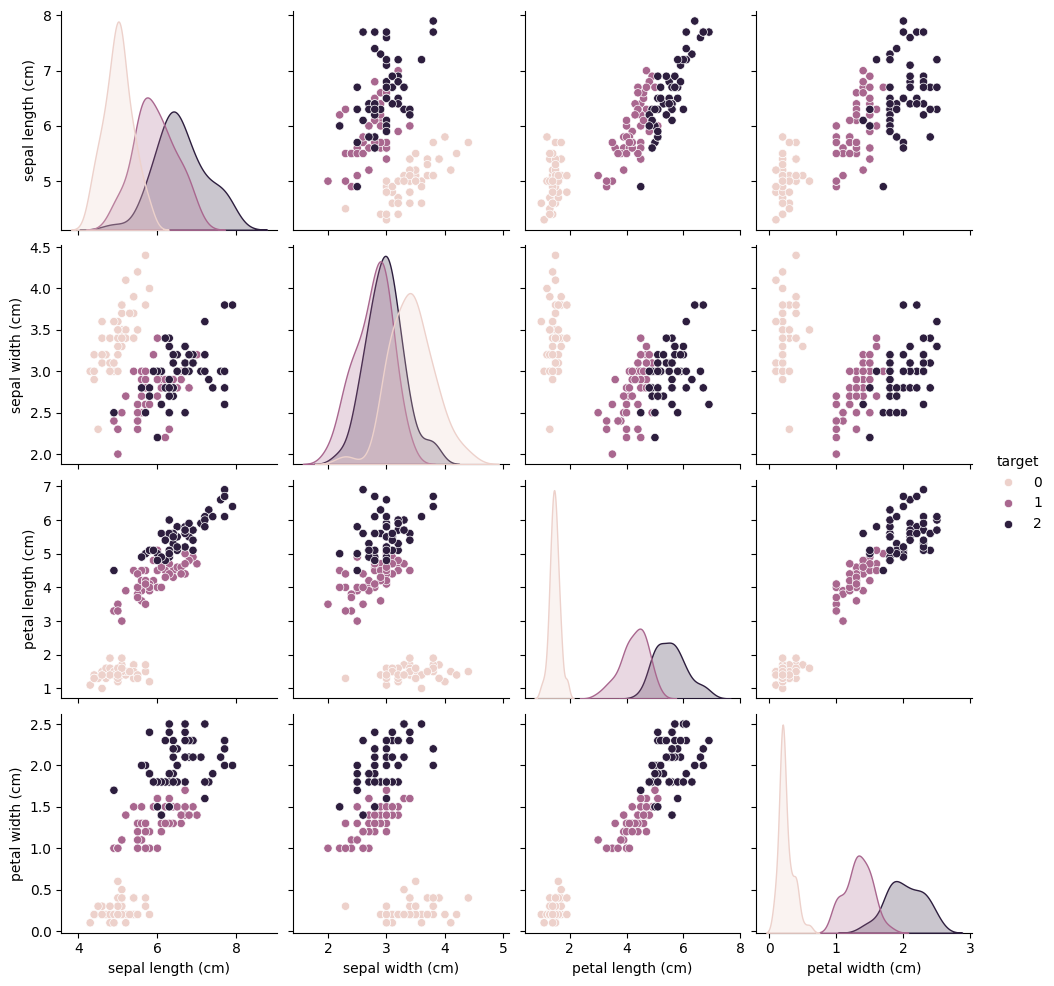

In [22]:
sns.pairplot(df, hue="target")

In [34]:
# Apply PCA
pca = PCA(n_components=4)  # we want to reduce to 2 dimensions
X_pca = pca.fit_transform(X)

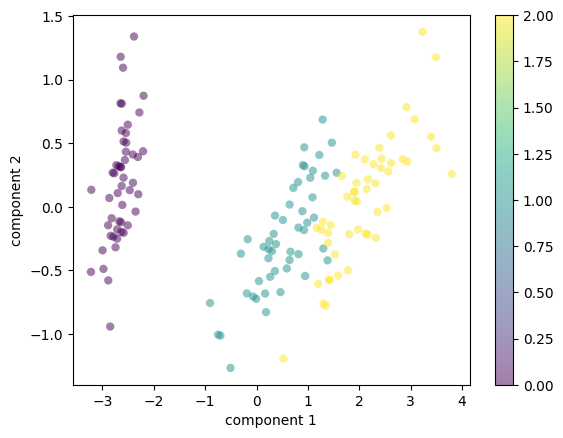

In [35]:
# Plot the data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

In [40]:
df2 = pd.DataFrame({f"component {i}": X_pca[:, i] for i in range(X_pca.shape[1])})
df2 = pd.concat((df2, load_iris(as_frame=True).target), axis=1)
df2

,component 0,component 1,component 2,component 3,target
0,-2.684126,0.319397,-0.027915,0.002262,0
1,-2.714142,-0.177001,-0.210464,0.099027,0
2,-2.888991,-0.144949,0.017900,0.019968,0
3,-2.745343,-0.318299,0.031559,-0.075576,0
4,-2.728717,0.326755,0.090079,-0.061259,0
...,...,...,...,...,...
145,1.944110,0.187532,0.177825,0.426196,2
146,1.527167,-0.375317,-0.121898,0.254367,2
147,1.764346,0.078859,0.130482,0.137001,2
148,1.900942,0.116628,0.723252,0.044595,2


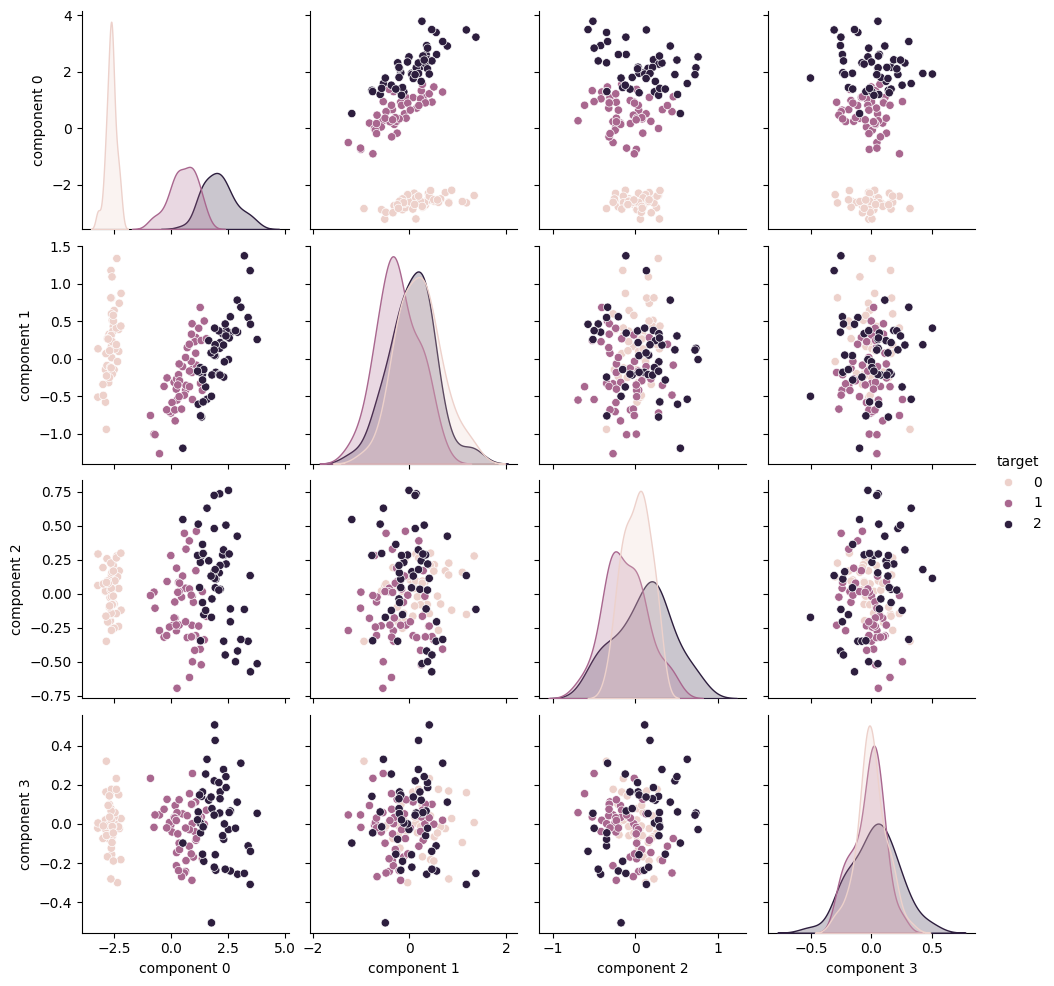

In [41]:
sns.pairplot(df2, hue="target")

array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

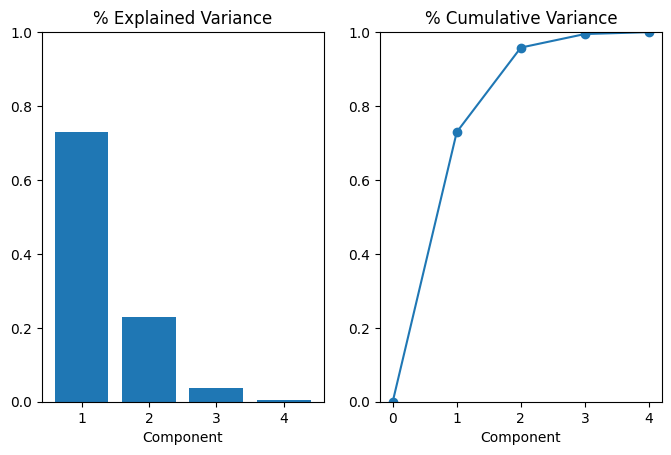

In [45]:
pca, X_pca, loadings = apply_pca(load_iris(as_frame=True).data)
plot_variance(pca)

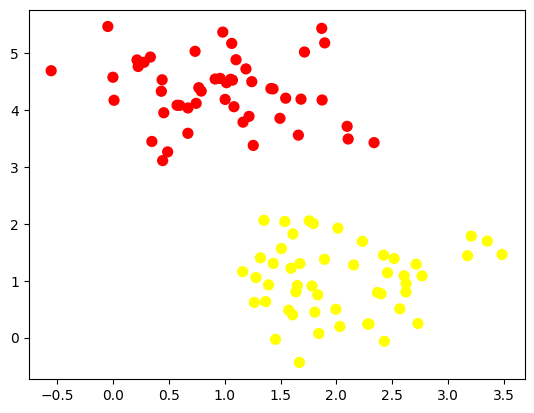

In [27]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

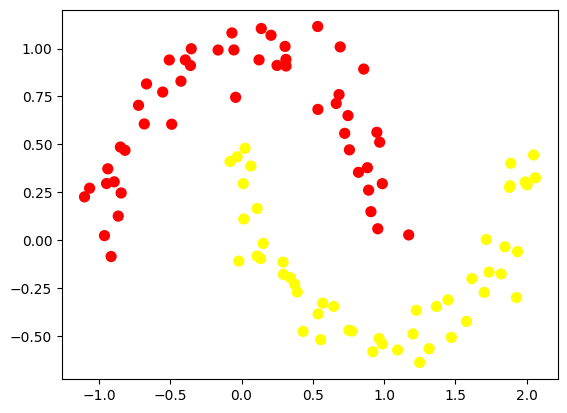

In [28]:
X, y = make_moons(n_samples=100, random_state=0, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

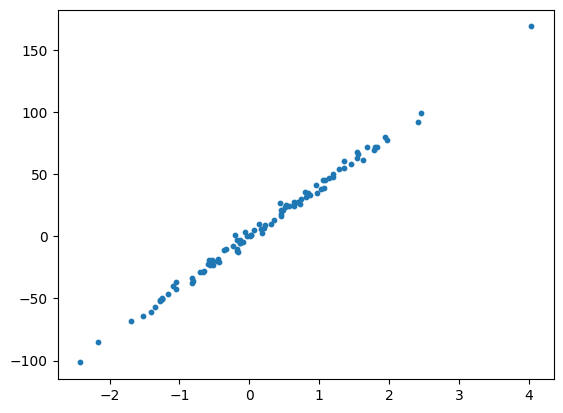

In [53]:
X, y = make_regression(n_samples=100, n_features=1, noise=3)
plt.scatter(X, y, s=10)

In [57]:
import numpy as np


kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(np.concatenate((X, y[:, None]), axis=1))

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

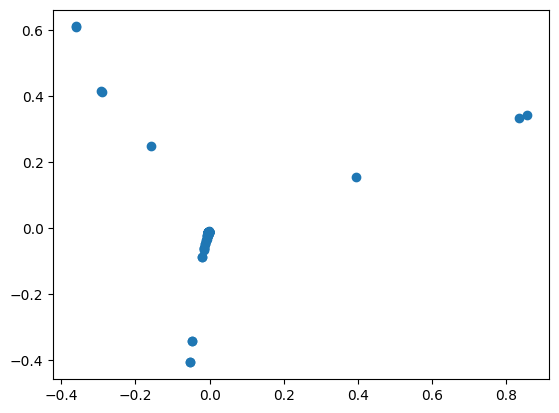

In [59]:
plt.scatter(X_kpca[:, 0], X_kpca[:, 1])
plt.show()

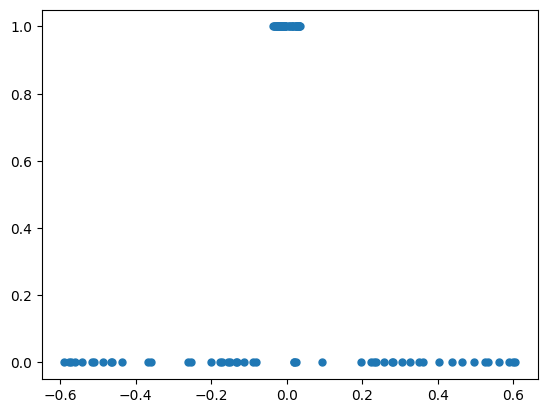

In [40]:
plt.plot(X_kpca[:,1], y, 'o', markersize=5)